In [1]:
!pip install -r requirements.txt > /dev/null

In [1]:
import torch
import pickle
import warnings
import datetime
import progressbar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch import nn
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from source.universalds import UniversalDataset
from source.constant import *
from source.modelbertclassifier import ModelBertClassifier
from source.modelalbertclassifier import ModelAlBertClassifier
from source.modeldebertaclassifier import ModelDeBertaClassifier
from source.trainer import Trainer
from source.models import models
print(DEVICE)
%matplotlib inline
warnings.filterwarnings('ignore')

cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased-sentence and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/LaBSE and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of AlbertForSequenceClassification were not initialized from the mo

cpu


In [1]:
from source.models import init_models

ModuleNotFoundError: No module named 'modelbertclassifier'

In [4]:
df = pd.read_csv(PATH, usecols=['annotation', 'rate'], sep=';')
train_data, valid_data = train_test_split(df, train_size=0.9, random_state=42)
print(f'Обучающая выборка: {len(train_data):,}\nВалидация: {len(valid_data):,}')

Обучающая выборка: 50,796
Валидация: 5,644


----------------------------------------------------------------------------------------------------
[1/7] BertBase


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.95it/s]


Epoch [1/2]: (Train/Validation)  Loss: 2.276/2.382,  Accuracy: 0.111/0.000,  t: 0:00:08.354428


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.09it/s]


Epoch [2/2]: (Train/Validation)  Loss: 2.123/2.330,  Accuracy: 0.556/0.000,  t: 0:00:15.836456
----------------------------------------------------------------------------------------------------
[2/7] DeepPavlov


  0%|                                                     | 0/1 [00:03<?, ?it/s]


KeyboardInterrupt: 

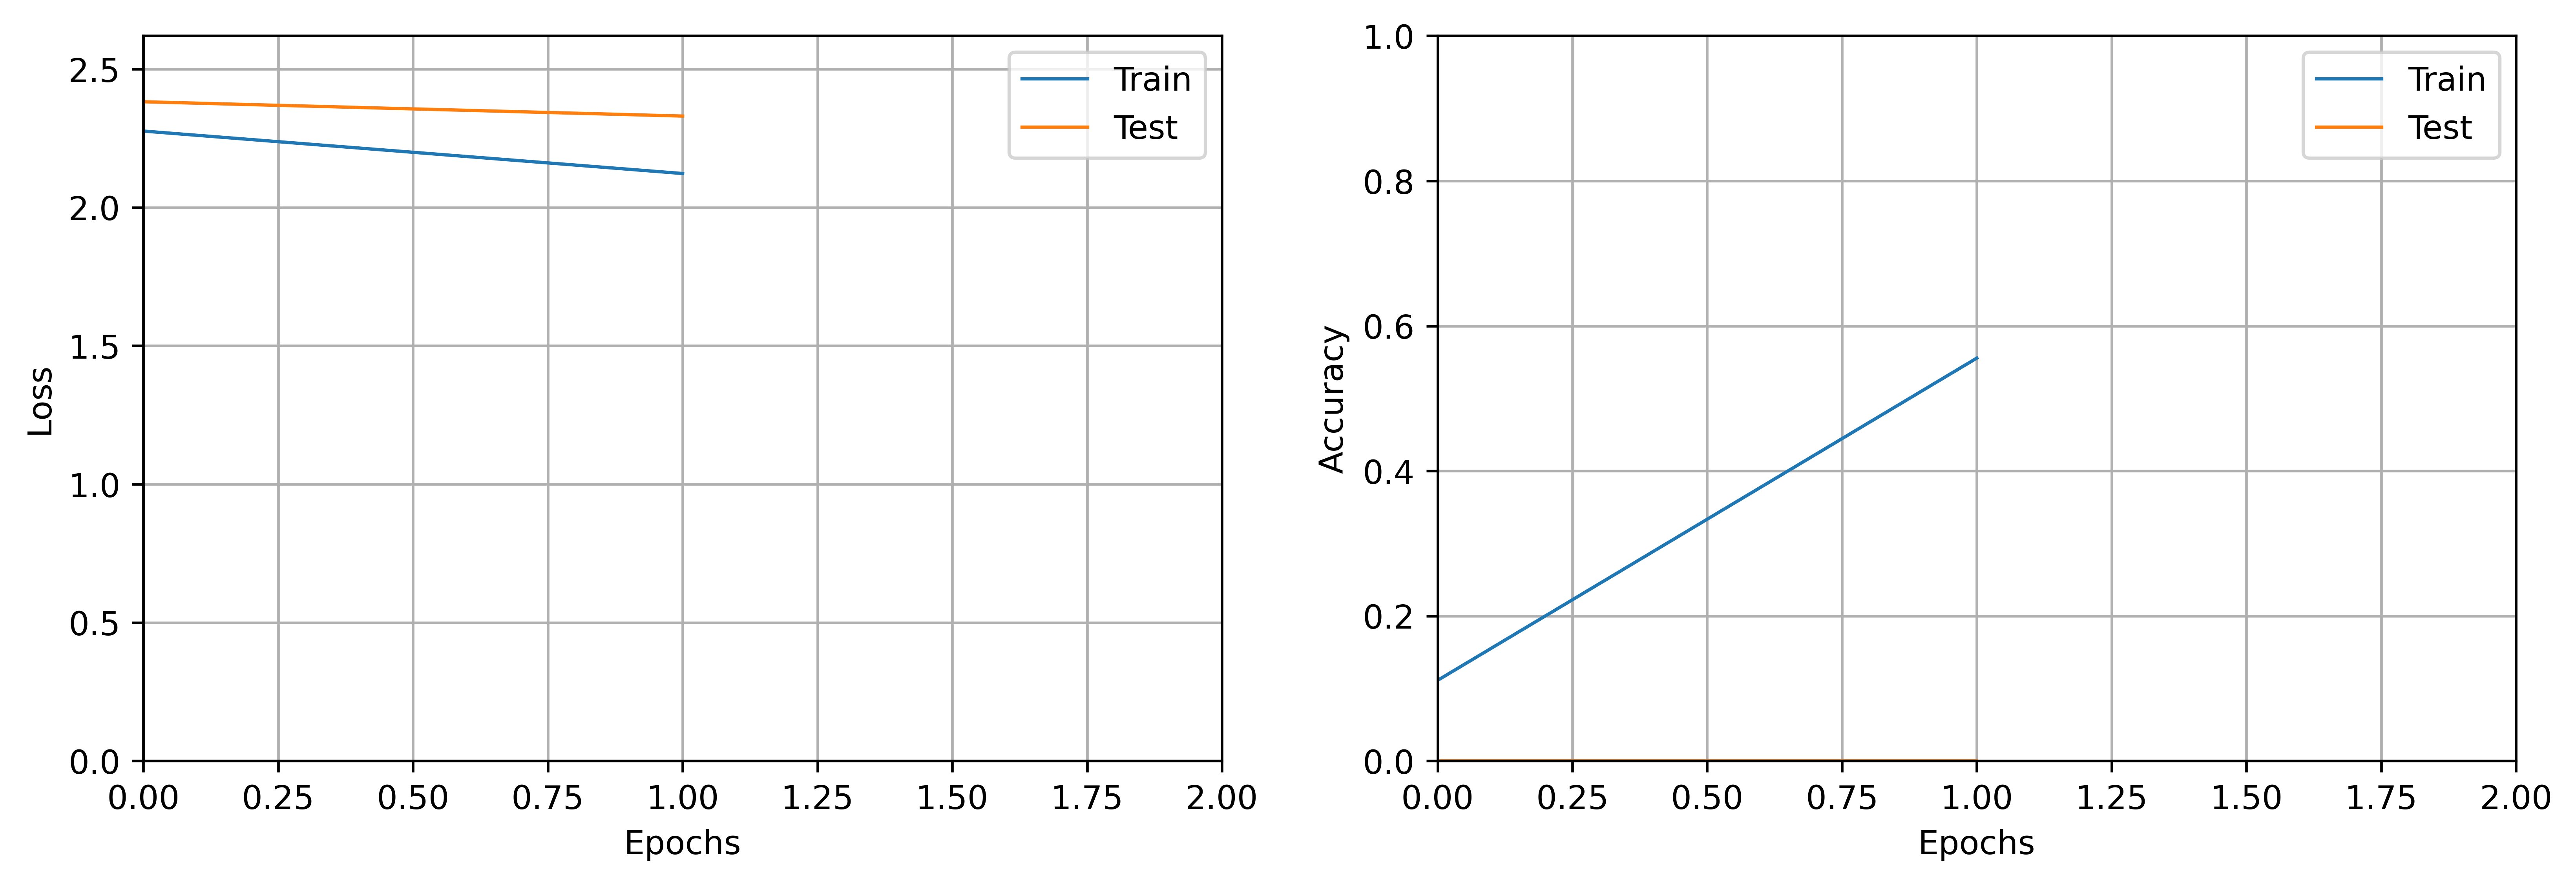

In [5]:
trainer = Trainer(models=models, batch_size=16, epochs=EPOCHS, device=DEVICE)

result = trainer.train_models(
    train_data['annotation'], train_data['rate'],
    valid_data['annotation'], valid_data['rate']
)

In [6]:
result.to_csv('result.csv')